# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-info">
<b>Описание проекта</b>
<br>
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
</div>

## Откройте и изучите файл

<div class="alert alert-info">
Импортируем библиотеки
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

<div class="alert alert-info">
Откроем датасет и посмотрим на представленные данные
</div>

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
display(data)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert alert-info">
Во всех столбцах значения с плавающей запятой, а в столбце <b>is_ultra</b> целые числа, данный столбец указывает каким тарифом пользовался абонент в течение месяца («Ультра» — 1, «Смарт» — 0).
<br>
Внимательно посмотрим на значения в представленном датасете
</div>

In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<div class="alert alert-info">
максимальное значение в столбце <b>is_ultra</b> 1, а минимальное 0
<br>
В инфе было написано, что предоработка данных уже была осуществлена, но на всякий случай проверим на наличие дубликатов в датасете
</div>

In [6]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


<div class="alert alert-info">
Отлично, дубликатов нет, посмотрим на общее распределение значений в каждом столбце
</div>

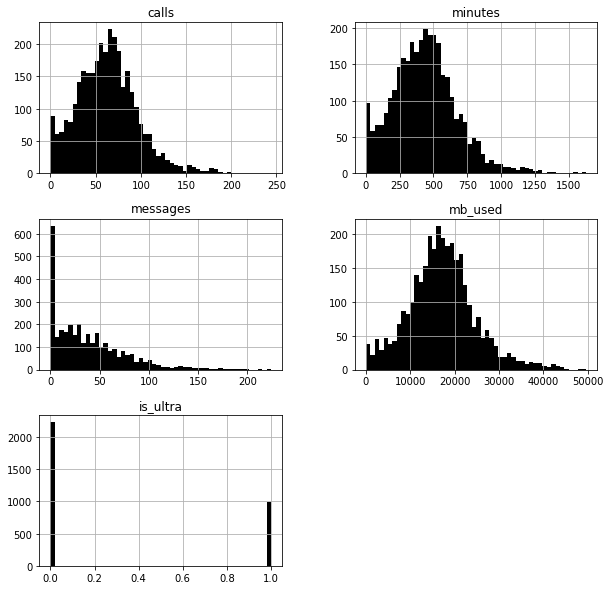

In [7]:
data.hist(figsize=(10, 10), bins = 50, color='black');

<div class="alert alert-info">
<b>сalls</b> — количество звонков,
<br>
<b>minutes</b> — суммарная длительность звонков в минутах,
<br>
<b>messages</b> — количество sms-сообщений,
<br>
<b>mb_used</b> — израсходованный интернет-трафик в Мб,
<br>
<b>is_ultra</b> — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).
<br>
<br>
<b>Цели:</b> Нам необходимо построить модель, которая будет определять каким пользователям стоит перейти на тариф "Ультра"
</div>

## Разбейте данные на выборки

<div class="alert alert-info">
Разделим данные на несколько частей.
<br>
Сначала разделим данные в соотношении 60 к 40
<br>
А затем разделим 40 пополам на проверочную часть и валидационную
<br>
<b>Первая</b> - обучающая часть (для обучения модели, назовем ее <b>data_train</b>)
<br>
<b>Вторая</b> - проверочная часть (для проверки на обучаемость модели, назовем ее <b>data_valid</b>) 
<br>
<b>Третья</b> - валидационная часть (для проверки точности/качества модели <b>data_test</b>)
<br>
<br>
<b>random_state</b> - это параметр, который отвечает за то, чтобы разделение данных происходило рандомно
</div>

In [8]:
data_train, data_valid = train_test_split(data, test_size=0.4, random_state=1)

In [9]:
data_valid, data_test = train_test_split(data_valid, test_size=0.5, random_state=1)

<div class="alert alert-info">
Разбили исходные данные на следующие выборки:
</div>

In [10]:
print('Исходные данные', data.shape)
print('')
print('Train:', data_train.shape, ' - ', "{:.0%}".format(data_train.shape[0] / data.shape[0]))
print('Valid:', data_valid.shape, ' - ', "{:.0%}".format(data_valid.shape[0] / data.shape[0]))
print('Test:', data_test.shape, ' - ', "{:.0%}".format(data_test.shape[0] / data.shape[0]))

Исходные данные (3214, 5)

Train: (1928, 5)  -  60%
Valid: (643, 5)  -  20%
Test: (643, 5)  -  20%


## Исследуйте модели

<div class="alert alert-info">
<b>Иссдедуем модели</b>
<br>
Для этого будем использовать несколько разных способов:
<br>
<br>
<b>-Древо решений</b> (посмотрим в разрезе разных показателей depth)
<br>
<b>-Случайный лес</b> (посмотрим в разрезе разных показателей depth)
<br>
<b>-Логистическая регрессия</b>
<br>
<br>
Целевой признак - столбец <b>is_ultra</b>
<br>
запихнем все в соответствующие переменные
</div>

In [11]:
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

<div class="alert alert-info">
<b>Древо решений</b>
</div>

<div class="alert alert-info">
Проверим циклом показатель точности при различной глубине
</div>

In [12]:
for depth in range(1, 101, 1):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    prediction_dt = model_dt.predict(features_valid)
    accuracy_dt = accuracy_score(target_valid, prediction_dt)
    print('При глубине [', depth, '] точность:','{:.5f}'.format(accuracy_dt))

При глубине [ 1 ] точность: 0.71851
При глубине [ 2 ] точность: 0.75583
При глубине [ 3 ] точность: 0.77138
При глубине [ 4 ] точность: 0.76672
При глубине [ 5 ] точность: 0.76983
При глубине [ 6 ] точность: 0.76827
При глубине [ 7 ] точность: 0.77916
При глубине [ 8 ] точность: 0.78383
При глубине [ 9 ] точность: 0.79471
При глубине [ 10 ] точность: 0.78227
При глубине [ 11 ] точность: 0.78849
При глубине [ 12 ] точность: 0.78538
При глубине [ 13 ] точность: 0.78849
При глубине [ 14 ] точность: 0.77138
При глубине [ 15 ] точность: 0.77449
При глубине [ 16 ] точность: 0.78227
При глубине [ 17 ] точность: 0.76827
При глубине [ 18 ] точность: 0.75272
При глубине [ 19 ] точность: 0.74184
При глубине [ 20 ] точность: 0.74650
При глубине [ 21 ] точность: 0.73250
При глубине [ 22 ] точность: 0.75117
При глубине [ 23 ] точность: 0.73872
При глубине [ 24 ] точность: 0.73406
При глубине [ 25 ] точность: 0.73561
При глубине [ 26 ] точность: 0.74184
При глубине [ 27 ] точность: 0.74806
При глубин

<div class="alert alert-info">
Самый высокий показатель точности - <b>0.79471</b>, при глубине - <b>9</b>
</div>

<div class="alert alert-info">
<b>Случайный лес</b>
</div>

In [13]:
for each in range(10, 310, 10):
    model_rf = RandomForestClassifier(n_estimators=each, max_depth=12, random_state=1)
    model_rf.fit(features_train, target_train)
    prediction_rf = model_rf.predict(features_valid)
    accuracy_rf = accuracy_score(target_valid, prediction_rf)
    print('n_estimators [', each, '] точность:','{:.5f}'.format(accuracy_rf))

n_estimators [ 10 ] точность: 0.78072
n_estimators [ 20 ] точность: 0.78694
n_estimators [ 30 ] точность: 0.79938
n_estimators [ 40 ] точность: 0.80404
n_estimators [ 50 ] точность: 0.80249
n_estimators [ 60 ] точность: 0.80249
n_estimators [ 70 ] точность: 0.79782
n_estimators [ 80 ] точность: 0.80093
n_estimators [ 90 ] точность: 0.80715
n_estimators [ 100 ] точность: 0.80560
n_estimators [ 110 ] точность: 0.80093
n_estimators [ 120 ] точность: 0.79782
n_estimators [ 130 ] точность: 0.79938
n_estimators [ 140 ] точность: 0.79938
n_estimators [ 150 ] точность: 0.79627
n_estimators [ 160 ] точность: 0.79782
n_estimators [ 170 ] точность: 0.79782
n_estimators [ 180 ] точность: 0.79627
n_estimators [ 190 ] точность: 0.79627
n_estimators [ 200 ] точность: 0.79471
n_estimators [ 210 ] точность: 0.79627
n_estimators [ 220 ] точность: 0.79316
n_estimators [ 230 ] точность: 0.79471
n_estimators [ 240 ] точность: 0.79471
n_estimators [ 250 ] точность: 0.79471
n_estimators [ 260 ] точность: 0.7

<div class="alert alert-info">
Самый высокий показатель точности - <b>0.80715</b>, при глубине - <b>12</b> и n_estimators - <b>90</b>
</div>

<div class="alert alert-info">
<b>Логистическая регрессия</b>
</div>

In [14]:
model_lr =  LogisticRegression()
model_lr.fit(features_train, target_train)
prediction_lr = model_lr.predict(features_valid)
accuracy_lr = accuracy_score(target_valid, prediction_lr)
print('Точность:','{:.5f}'.format(accuracy_lr))

Точность: 0.72006


<div class="alert alert-info">
<b>Вывод</b>
<br>
Использовали три разных способа изучения моделей обучения
<br>
Получили следующие результаты:
<br>
<b>Древо решений</b> - самый высокий показатель точности - <b>0.79471</b>, при глубине - <b>9</b>
<br>
<br>
<b>Случайный лес</b> - самый высокий показатель точности - <b>0.80715</b>, при глубине - <b>12</b> и n_estimators - <b>89</b>
<br>
<br>
<b>Логистическая регрессия</b> - самый высокий показатель точности - <b>0.72006</b>
</div>

<div class="alert alert-info">
Случайный лес it is
</div>

## Проверьте модель на тестовой выборке

<div class="alert alert-info">
Зададим выбранные параметры для случайного леса и проверим на тестовой выборке
</div>

In [15]:
model_final = RandomForestClassifier(random_state=12345, n_estimators=89, max_depth=12)
model_final.fit(features_train, target_train)
prediction_final = model_final.predict(features_test)
accuracy_final = accuracy_score(target_test, prediction_final)
print('Точность =','{:.5f}'.format(accuracy_final))

Точность = 0.80404


<div class="alert alert-info">
<b>Вывод</b>
<br>
Ну по идее вышло круто, точность получилась очень близкой к нашей тестовой
</div>

## (бонус) Проверьте модели на адекватность

In [16]:
adeq = DummyClassifier(strategy="most_frequent", random_state=0)
adeq.fit(features_valid, target_valid)
print('Точность =','{:.5f}'.format(adeq.score(features_valid, target_valid)))

Точность = 0.66407


<div class="alert alert-info">
<b>Вывод</b>
<br>
По изначальному условию нужно довести долю правильных ответов по крайней мере до 0.75, а в нашем проекте получилось 0.80!
<br>
Надеюсь получилось корректно
</div>